In [107]:
import pandas as pd
import nibabel as nib
from nilearn import plotting
from nilearn.plotting import plot_prob_atlas
import numpy as np
import matplotlib.pyplot as plt
from nilearn import surface, datasets, plotting
import os

In [90]:
# Load the Excel file
excel_path = '/Users/rachelmorse/Documents/2023:2024/CR & BM Project/Task invariant network/Shirer atlas.xlsx'
df = pd.read_excel(excel_path)

# Filter rows where ROI_network is 'AS'
sn = df[df['ROI_network'] == 'AS']

# Extract the corresponding volume indices
sn_volumes = sn['ROI'].tolist()

# Repeat for the other networks
dmn = df[df['ROI_network'].str.contains('dDMN|vDMN')]
dmn_volumes = dmn['ROI'].tolist()

ecn = df[df['ROI_network'].str.contains('RECN|LECN')]
ecn_volumes = ecn['ROI'].tolist()

print(sn_volumes)
print(dmn_volumes)
print(ecn_volumes)

[0, 1, 2, 3, 4, 5, 6]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
[33, 34, 35, 36, 37, 38, 63, 64, 65, 66, 67, 68]


In [83]:
# Load the Shirer atlas NIFTI file
atlas_path = '/Users/rachelmorse/Documents/2023:2024/CR & BM Project/Task invariant network/subrois_shirer2012_mod_4d.nii.gz' 
atlas_img = nib.load(atlas_path)

Image saved to /Users/rachelmorse/Downloads/sn_mask_img.nii


Text(0.5, 0.98, 'Anterior Salience Network')

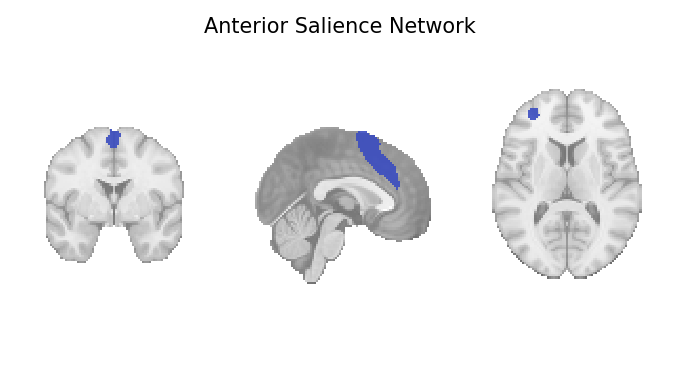

In [111]:
# Make a mask of the Anterior Salience Network

# Stack all AN ROIs into one 4D image
sn_data = atlas_img.get_fdata()[..., sn_volumes]

# Sum the AN ROIs to create a 3D mask
sn_mask_data = np.sum(sn_data, axis=-1)
sn_mask_data = (sn_mask_data > 0).astype(np.float32) 

sn_mask_img = nib.Nifti1Image(sn_mask_data, affine=atlas_img.affine)

# Plot Salience Network
plotting.plot_roi(sn_mask_img, display_mode='ortho', cut_coords=(0, 0, 10),
                cmap='coolwarm', alpha=0.9, annotate=False, draw_cross=False)

# Show the plots
plt.suptitle(f'Anterior Salience Network', color='black', backgroundcolor='white', size=15)

Text(0.5, 0.98, 'Default Mode Network')

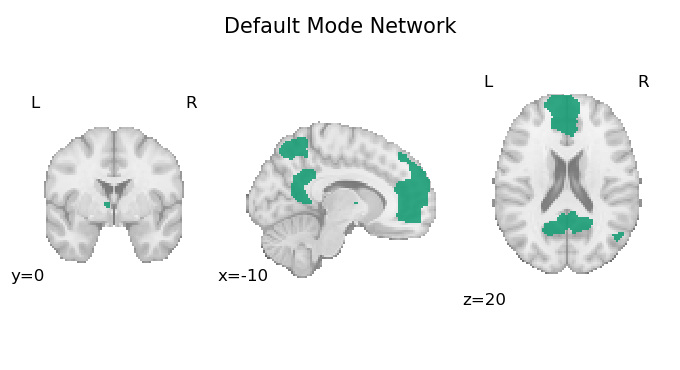

In [98]:
# Make a mask of the Default Mode Network

# Stack all DMN ROIs into one 4D image
dmn_data = atlas_img.get_fdata()[..., dmn_volumes]

# Sum the DMN ROIs to create a 3D mask
dmn_mask_data = np.sum(dmn_data, axis=-1)
dmn_mask_data = (dmn_mask_data > 0).astype(np.float32) 

dmn_mask_img = nib.Nifti1Image(dmn_mask_data, affine=atlas_img.affine)

# Plot DMN
plotting.plot_roi(dmn_mask_img, display_mode='ortho', cut_coords=(-10, 0, 20),
                  cmap='Dark2', alpha=0.9, annotate=True, draw_cross=False)

# Show the plots
plt.suptitle(f'Default Mode Network', color='black', backgroundcolor='white', size=15)

/Users/rachelmorse/opt/anaconda3/envs/mri/lib/python3.12/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0.5, 0.98, 'Executive Control Network')

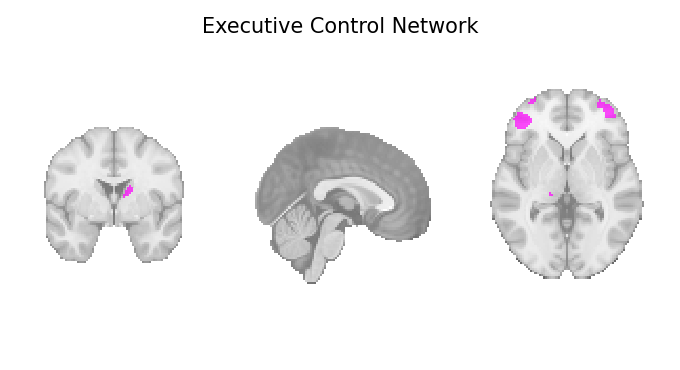

In [86]:
# Make a mask of the Executive Control Network

# Stack all DMN ROIs into one 4D image
ecn_data = atlas_img.get_fdata()[..., ecn_volumes]

# Sum the DMN ROIs to create a 3D mask
ecn_mask_data = np.sum(ecn_data, axis=-1)
ecn_mask_data = (ecn_mask_data > 0).astype(np.float32) 

ecn_mask_img = nib.Nifti1Image(ecn_mask_data, affine=atlas_img.affine)

# Plot Salience Network
display = plotting.plot_roi(ecn_mask_img, display_mode='ortho', cut_coords=(0, 0, 0),
                  cmap='spring', annotate=False, draw_cross=False)

plt.suptitle(f'Executive Control Network', color='black', backgroundcolor='white', size=15)

Image saved to /Users/rachelmorse/Downloads/combined_mask_img.nii


Text(0.5, 0.98, 'All Networks')

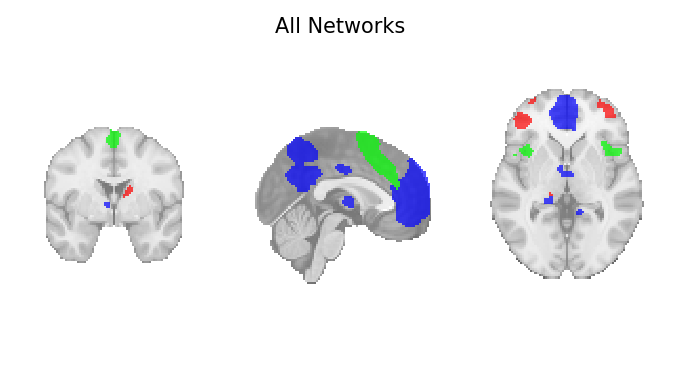

In [116]:
# Make a mask of the Executive Control Network

# Assign distinct labels to each network
dmn_mask_data = (dmn_mask_data > 0).astype(np.int32) * 1  # Label as 1
ecn_mask_data = (ecn_mask_data > 0).astype(np.int32) * 2  # Label as 2
sn_mask_data = (sn_mask_data > 0).astype(np.int32) * 3    # Label as 3

# Combine the labeled data
combined_data = dmn_mask_data + ecn_mask_data + sn_mask_data
combined_mask_data = combined_data.astype(np.float32)

# When the masks overlap (eg a ROI is in two networks), label as highest value
combined_mask_data = np.maximum.reduce([dmn_mask_data, ecn_mask_data, sn_mask_data])

combined_mask_img = nib.Nifti1Image(combined_mask_data, affine=atlas_img.affine)

# Define the path to the Downloads folder
downloads_path = os.path.expanduser('~/Downloads/combined_mask_img.nii')

# Save the NIfTI image
nib.save(combined_mask_img, downloads_path)

print(f"Image saved to {downloads_path}")

# Plot the combined networks
display = plotting.plot_roi(combined_mask_img, display_mode='ortho', cut_coords=(0, 0, 0),
                            cmap='brg', annotate=False, draw_cross=False)

plt.suptitle('All Networks', color='black', backgroundcolor='white', fontsize=15)

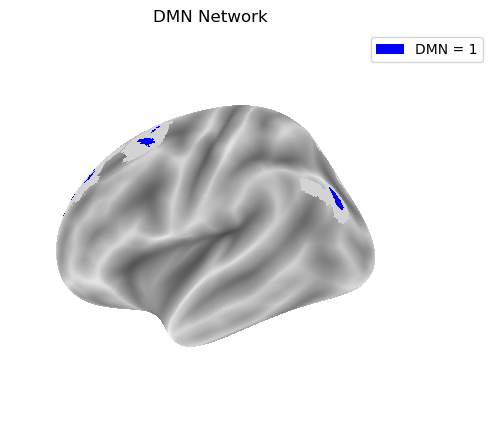

In [134]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from nilearn import datasets, surface, plotting

# Load fsaverage mesh
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

# Project the DMN image data onto the surface
texture_left = surface.vol_to_surf(dmn_mask_img, fsaverage.pial_left)

# Define a custom colormap for the DMN only
dmn_cmap = ListedColormap(['lightgray', 'blue'])

# Plot left hemisphere using the DMN data
plot = plotting.plot_surf_roi(
    fsaverage.infl_left, roi_map=texture_left,
    hemi='left', view='lateral', cmap=dmn_cmap,
    title='DMN Network', colorbar=False,
    bg_map=fsaverage.sulc_left
)

# Create a simple legend for DMN
legend_elements = [Patch(facecolor='blue', label='DMN = 1')]

plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1))

plotting.show()